<a href="https://colab.research.google.com/github/SriRamK345/RetailSalses_Forecast/blob/main/Final_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Final_Project

### Basic Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the datasets

In [4]:
# load store dataset
df_store = pd.read_csv("/content/stores_data_set.csv")
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
df_sales = pd.read_csv("/content/sales_data_set.csv")
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [6]:
df_feature = pd.read_csv("/content/Features_data_set.csv")
df_feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [8]:
df_store.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [9]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [10]:
df_sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [11]:
df_sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [12]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [13]:
df_feature.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [14]:
df_feature.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [15]:
df_feature.shape

(8190, 12)

In [16]:
df_feature.Store.unique(),"------------#########----------",len(df_feature.Store.unique())

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 '------------#########----------',
 45)

In [17]:
df_store.shape

(45, 3)

In [18]:
df_sales.shape

(421570, 5)

### Combining Datasets

In [19]:
merged_df = pd.merge(df_store, df_sales, on='Store', how='outer')
merged_df

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday
0,1,A,151315,1,05/02/2010,24924.50,False
1,1,A,151315,1,12/02/2010,46039.49,True
2,1,A,151315,1,19/02/2010,41595.55,False
3,1,A,151315,1,26/02/2010,19403.54,False
4,1,A,151315,1,05/03/2010,21827.90,False
...,...,...,...,...,...,...,...
421565,45,B,118221,98,28/09/2012,508.37,False
421566,45,B,118221,98,05/10/2012,628.10,False
421567,45,B,118221,98,12/10/2012,1061.02,False
421568,45,B,118221,98,19/10/2012,760.01,False


In [20]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  int64  
 3   Dept          421570 non-null  int64  
 4   Date          421570 non-null  object 
 5   Weekly_Sales  421570 non-null  float64
 6   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 19.7+ MB


In [21]:
merged_df.isnull().sum()

Store           0
Type            0
Size            0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [22]:
df = pd.merge(merged_df, df_feature, on=['Store','Date'], how='outer')
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,A,151315.0,1.0,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315.0,2.0,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315.0,3.0,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315.0,4.0,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315.0,5.0,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,423325.0,22.203860,12.786244,1.000,11.000000,22.000000,33.000000,45.000000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.000000,202505.000000,219622.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.000000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.030000,20205.852500,693099.360000
Temperature,423325.0,60.067140,18.452599,-7.290,46.670000,62.070000,74.260000,101.950000
Fuel_Price,423325.0,3.361933,0.458038,2.472,2.935000,3.452000,3.738000,4.468000
MarkDown1,152433.0,7246.604247,8319.906707,-2781.450,2230.800000,5336.520000,9210.900000,103184.980000
MarkDown2,112532.0,3337.597289,9461.265420,-265.760,42.000000,194.670000,1943.200000,104519.540000
MarkDown3,138658.0,1449.098932,9674.705234,-179.260,5.140000,24.830000,104.500000,149483.310000
MarkDown4,136466.0,3382.019834,6306.728468,0.220,500.910000,1465.540000,3592.000000,67474.850000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423325 entries, 0 to 423324
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         423325 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  float64
 3   Dept          421570 non-null  float64
 4   Date          423325 non-null  object 
 5   Weekly_Sales  421570 non-null  float64
 6   IsHoliday_x   421570 non-null  object 
 7   Temperature   423325 non-null  float64
 8   Fuel_Price    423325 non-null  float64
 9   MarkDown1     152433 non-null  float64
 10  MarkDown2     112532 non-null  float64
 11  MarkDown3     138658 non-null  float64
 12  MarkDown4     136466 non-null  float64
 13  MarkDown5     153187 non-null  float64
 14  CPI           422740 non-null  float64
 15  Unemployment  422740 non-null  float64
 16  IsHoliday_y   423325 non-null  bool   
dtypes: bool(1), float64(12), int64(1), object(3)
mem

In [25]:
df.isnull().sum()

Store                0
Type              1755
Size              1755
Dept              1755
Date                 0
Weekly_Sales      1755
IsHoliday_x       1755
Temperature          0
Fuel_Price           0
MarkDown1       270892
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
IsHoliday_y          0
dtype: int64

In [26]:
df.columns

Index(['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y'],
      dtype='object')

In [27]:
df.count()

Store           423325
Type            421570
Size            421570
Dept            421570
Date            423325
Weekly_Sales    421570
IsHoliday_x     421570
Temperature     423325
Fuel_Price      423325
MarkDown1       152433
MarkDown2       112532
MarkDown3       138658
MarkDown4       136466
MarkDown5       153187
CPI             422740
Unemployment    422740
IsHoliday_y     423325
dtype: int64

In [28]:
df.IsHoliday_x.value_counts()

IsHoliday_x
False    391909
True      29661
Name: count, dtype: int64

In [29]:
df.IsHoliday_y.value_counts()

IsHoliday_y
False    393529
True      29796
Name: count, dtype: int64

In [30]:
df= df.drop(columns=['IsHoliday_x'])

# Replace column name
df.rename(columns={'IsHoliday_y': 'IsHoliday'}, inplace=True)

In [41]:
# Dependent - Weekly_Sales
# Supervised Regression

continuous_columns = ['Size', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
                      'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
category_columns = ["Store",  "Type", "IsHoliday", "Dept"]

In [32]:
string_columns = df.select_dtypes(exclude=['int64',"float64","datetime64"]).columns
numeric_columns = df.select_dtypes(include=['int64',"float64"]).columns

In [40]:
#checking the unique values involved and if all the values are in appropriate datatypes
for col in category_columns:
  print(f'Unique values for "{col}": {df[col].unique()}')
  print("------------------------------------------------")

Unique values for "Store": [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
------------------------------------------------
Unique values for "Type": ['A' 'B' 'C' nan]
------------------------------------------------
Unique values for "IsHoliday": [False  True]
------------------------------------------------
Unique values for "Dept": [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 16. 17. 18. 19.
 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37.
 38. 40. 41. 42. 44. 45. 46. 47. 48. 49. 51. 52. 54. 55. 56. 58. 59. 60.
 67. 71. 72. 74. 79. 80. 81. 82. 83. 85. 87. 90. 91. 92. 93. 94. 95. 97.
 98. 78. 96. 99. 77. 39. 50. 43. 65. nan]
------------------------------------------------


In [44]:
# encoding for catagorical features into numerical
df['IsHoliday'] = df['IsHoliday'].map({True:1, False:0})
df['Type'] = df['Type'].map({'A':1, 'B':2, 'C':3})

In [45]:
df.tail()

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
423320,45,NaN,NaN,NaN,28/06/2013,NaN,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,0
423321,45,NaN,NaN,NaN,05/07/2013,NaN,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,0
423322,45,NaN,NaN,NaN,12/07/2013,NaN,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,0
423323,45,NaN,NaN,NaN,19/07/2013,NaN,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,0
423324,45,NaN,NaN,NaN,26/07/2013,NaN,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,0


In [46]:
# make Date feature into --> Day,Month,Year new features and drop Date column
df.Date=pd.to_datetime(df.Date, format="%d/%m/%Y")
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df = df.drop(columns=['Date'])
df.head()

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year
0,1,1.0,151315.0,1.0,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
1,1,1.0,151315.0,2.0,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
2,1,1.0,151315.0,3.0,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
3,1,1.0,151315.0,4.0,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
4,1,1.0,151315.0,5.0,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423325 entries, 0 to 423324
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         423325 non-null  int64  
 1   Type          421570 non-null  float64
 2   Size          421570 non-null  float64
 3   Dept          421570 non-null  float64
 4   Weekly_Sales  421570 non-null  float64
 5   Temperature   423325 non-null  float64
 6   Fuel_Price    423325 non-null  float64
 7   MarkDown1     152433 non-null  float64
 8   MarkDown2     112532 non-null  float64
 9   MarkDown3     138658 non-null  float64
 10  MarkDown4     136466 non-null  float64
 11  MarkDown5     153187 non-null  float64
 12  CPI           422740 non-null  float64
 13  Unemployment  422740 non-null  float64
 14  IsHoliday     423325 non-null  int64  
 15  Day           423325 non-null  int32  
 16  Month         423325 non-null  int32  
 17  Year          423325 non-null  int32  
dtypes: f

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,423325.0,22.203860,12.786244,1.000,11.000000,22.000000,33.000000,45.000000
Type,421570.0,1.589912,0.666337,1.000,1.000000,1.000000,2.000000,3.000000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.000000,202505.000000,219622.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.000000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.030000,20205.852500,693099.360000
Temperature,423325.0,60.067140,18.452599,-7.290,46.670000,62.070000,74.260000,101.950000
Fuel_Price,423325.0,3.361933,0.458038,2.472,2.935000,3.452000,3.738000,4.468000
MarkDown1,152433.0,7246.604247,8319.906707,-2781.450,2230.800000,5336.520000,9210.900000,103184.980000
MarkDown2,112532.0,3337.597289,9461.265420,-265.760,42.000000,194.670000,1943.200000,104519.540000
MarkDown3,138658.0,1449.098932,9674.705234,-179.260,5.140000,24.830000,104.500000,149483.310000


In [49]:
df.corr(numeric_only=True)

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year
Store,1.000000,0.226410,-0.182881,0.024004,-0.085195,-0.050010,0.065511,-0.119556,-0.035294,-0.031497,-0.009739,-0.025095,-0.211049,0.208441,-0.000539,-0.000017,0.000948,0.003536
Type,0.226410,1.000000,-0.811593,0.003708,-0.182242,0.042981,0.029687,-0.257427,-0.067034,-0.037560,-0.108991,-0.258835,-0.065812,0.148720,-0.000798,0.000279,-0.000069,0.004208
Size,-0.182881,-0.811593,1.000000,-0.002966,0.243828,-0.058313,0.003361,0.345673,0.108827,0.048913,0.168196,0.304575,-0.003314,-0.068238,0.000593,-0.000386,-0.001210,-0.004975
Dept,0.024004,0.003708,-0.002966,1.000000,0.148032,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837,0.000916,-0.000678,0.000904,0.003738
Weekly_Sales,-0.085195,-0.182242,0.243828,0.148032,1.000000,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864,0.012774,-0.006187,0.028409,-0.010111
Temperature,-0.050010,0.042981,-0.058313,0.004437,-0.002312,1.000000,0.142966,-0.042775,-0.323832,-0.096324,-0.063825,-0.016037,0.181789,0.097758,-0.156080,0.027102,0.235810,0.062646
Fuel_Price,0.065511,0.029687,0.003361,0.003572,-0.000120,0.142966,1.000000,0.061576,-0.220342,-0.100873,-0.044013,-0.119969,-0.164460,-0.033905,-0.078261,0.027957,-0.041409,0.774914
MarkDown1,-0.119556,-0.257427,0.345673,-0.002426,0.085251,-0.042775,0.061576,1.000000,0.024284,-0.107607,0.818921,0.153286,-0.055185,0.049592,-0.030128,-0.291061,-0.175830,0.135434
MarkDown2,-0.035294,-0.067034,0.108827,0.000290,0.024130,-0.323832,-0.220342,0.024284,1.000000,-0.050208,-0.008785,-0.007394,-0.039604,0.020335,0.334060,0.063338,-0.004928,-0.213286
MarkDown3,-0.031497,-0.037560,0.048913,0.001784,0.060385,-0.096324,-0.100873,-0.107607,-0.050208,1.000000,-0.070855,-0.025492,-0.023445,0.012250,0.428452,0.137756,0.188130,-0.305599


In [50]:
# check negative weekly_sales count
len(df[df['Weekly_Sales']<=0])

1358

In [142]:
# negative weekly_sales value convert to null value
df['Weekly_Sales'] = df['Weekly_Sales'].apply(lambda x: np.nan if x<=0 else x)
df.tail()

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year
423320,45,NaN,NaN,NaN,NaN,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,0,28,6,2013
423321,45,NaN,NaN,NaN,NaN,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,0,5,7,2013
423322,45,NaN,NaN,NaN,NaN,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,0,12,7,2013
423323,45,NaN,NaN,NaN,NaN,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,0,19,7,2013
423324,45,NaN,NaN,NaN,NaN,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,0,26,7,2013


In [143]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,423325.0,22.203860,12.786244,1.000,11.000000,22.000000,33.000000,45.000000
Type,421570.0,1.589912,0.666337,1.000,1.000000,1.000000,2.000000,3.000000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.000000,202505.000000,219622.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.000000,74.000000,99.000000
Weekly_Sales,420212.0,16033.114591,22729.492116,0.010,2120.130000,7661.700000,20271.265000,693099.360000
Temperature,423325.0,60.067140,18.452599,-7.290,46.670000,62.070000,74.260000,101.950000
Fuel_Price,423325.0,3.361933,0.458038,2.472,2.935000,3.452000,3.738000,4.468000
MarkDown1,152433.0,7246.604247,8319.906707,-2781.450,2230.800000,5336.520000,9210.900000,103184.980000
MarkDown2,112532.0,3337.597289,9461.265420,-265.760,42.000000,194.670000,1943.200000,104519.540000
MarkDown3,138658.0,1449.098932,9674.705234,-179.260,5.140000,24.830000,104.500000,149483.310000


In [144]:
# check null values of all features
df.isnull().sum()

Store                0
Type              1755
Size              1755
Dept              1755
Weekly_Sales      3113
Temperature          0
Fuel_Price           0
MarkDown1       270892
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
IsHoliday            0
Day                  0
Month                0
Year                 0
dtype: int64

### Exploratory Data Anylysis (EDA)

In [145]:
# def plot(df, column):
#     plt.figure(figsize=(20,5),dpi=80)
#     plt.subplot(1,2,1)
#     sns.boxplot(data=df, x=column,color='blue')
#     plt.title(f'Box Plot for {column}')

#     plt.subplot(1,2,2)
#     sns.histplot(data=df, x=column, kde=True, bins=50, color='blue')
#     plt.title(f'Distribution Plot for {column}')

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot(df, column):
    # Setting the style for seaborn
    sns.set_style("whitegrid")

    plt.figure(figsize=(20, 5)) # Creating the figure with a specific size

    # Creating the first subplot for the box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=column, color='blue')
    plt.title(f'Box Plot for {column}', fontsize=16,color ="red")
    plt.xlabel(f'{column}', fontsize=14)
    plt.ylabel('Value', fontsize=14)

    # Adding mean and median lines
    mean = df[column].mean()
    median = df[column].median()

    # Creating the second subplot for the distribution plot
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=column, bins=50, color='blue',kde = True)
    plt.title(f'Distribution Plot for {column}', fontsize=16, color = 'red')
    plt.xlabel(f'{column}', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Adding mean and median lines to the distribution plot
    plt.axvline(mean, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean:.2f}')
    plt.axvline(median, color= 'green', linestyle='--', linewidth=1, label=f'Median: {median:.2f}')
    plt.legend()

    # Adjusting the layout
    plt.tight_layout()

    # Displaying the plots
    plt.show()

ValueError: Invalid RGBA argument: 'DSD'

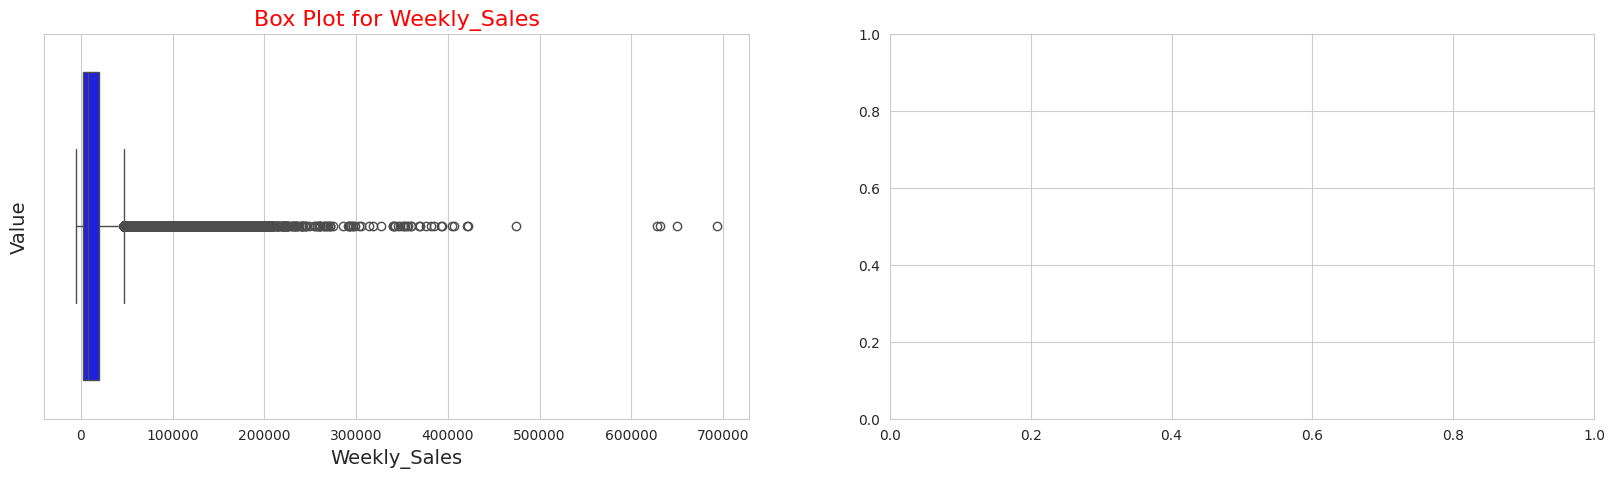

In [91]:
plot(df, 'Weekly_Sales')

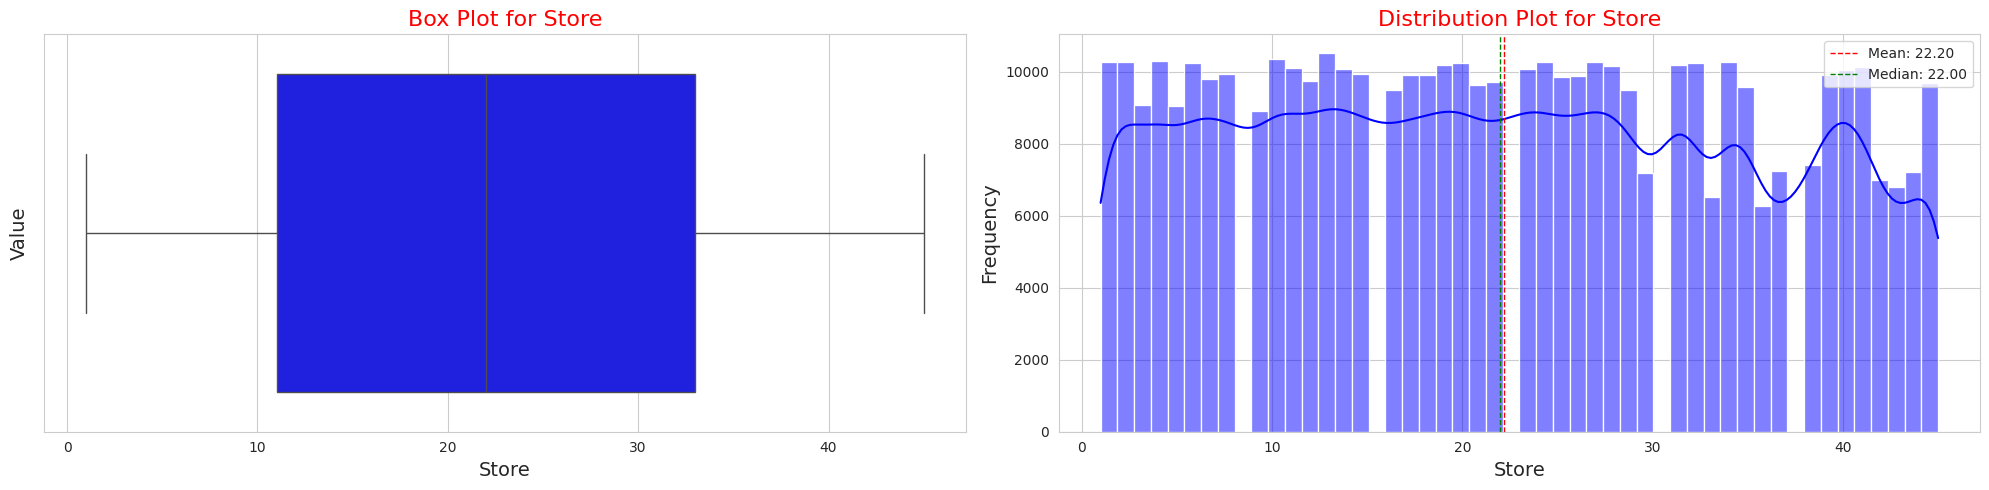

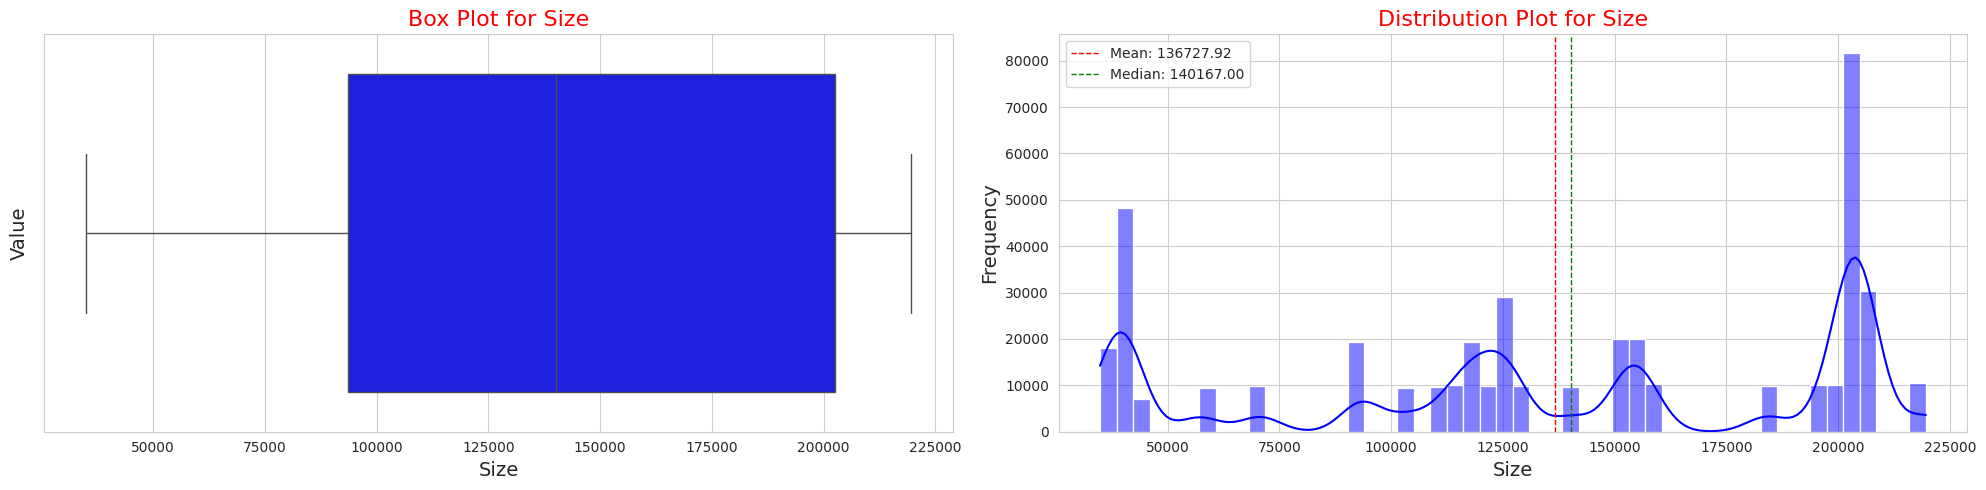

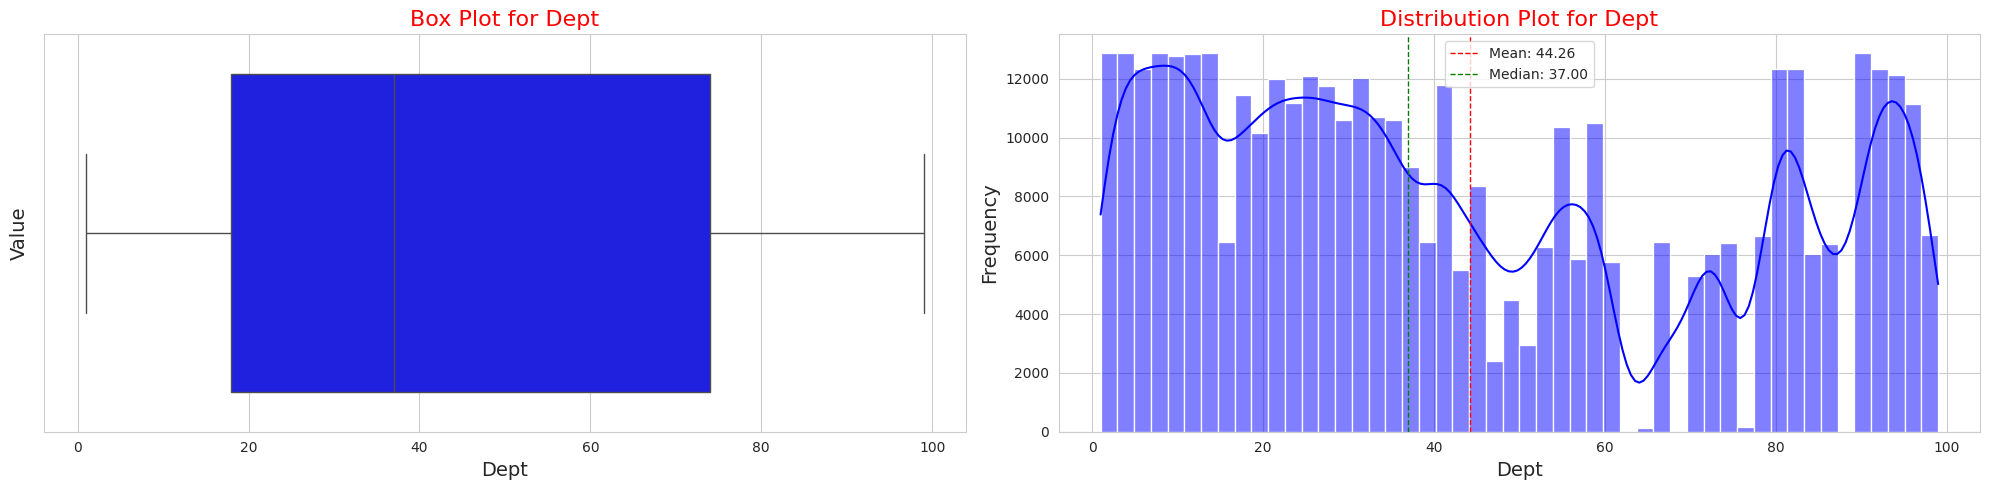

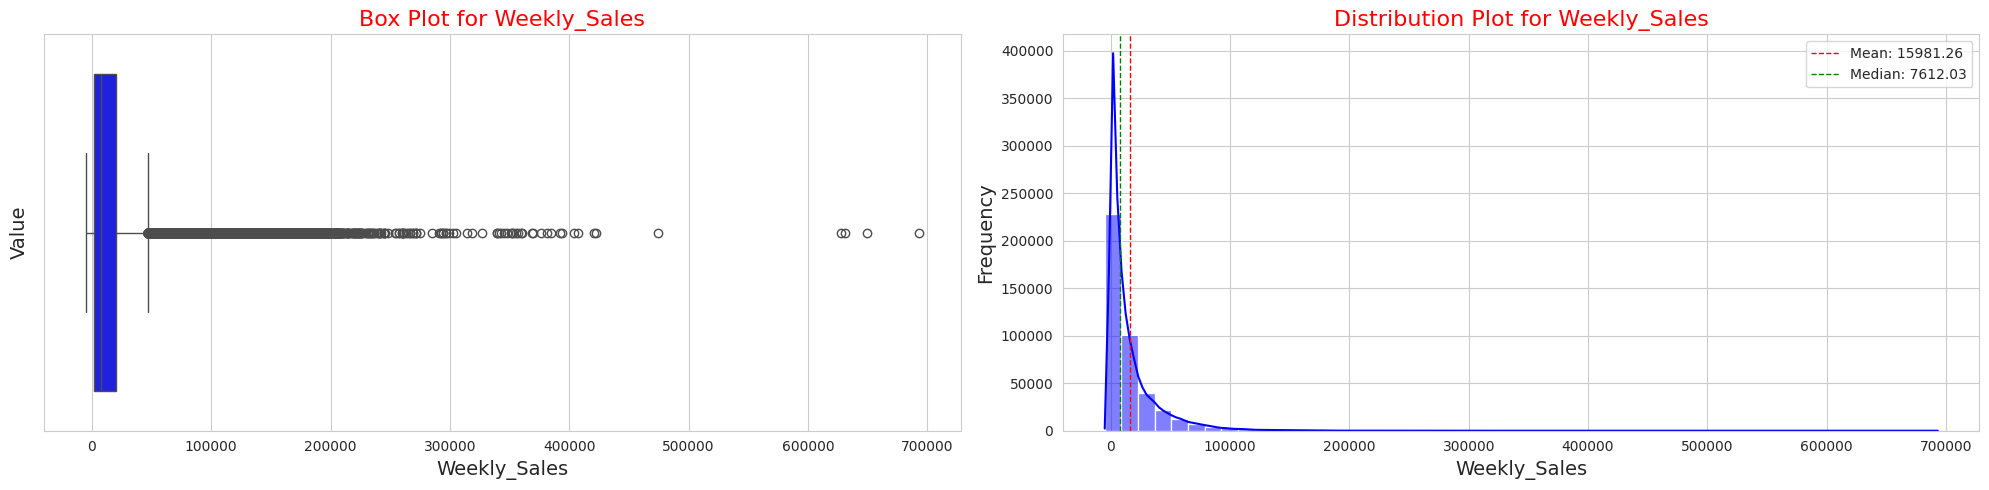

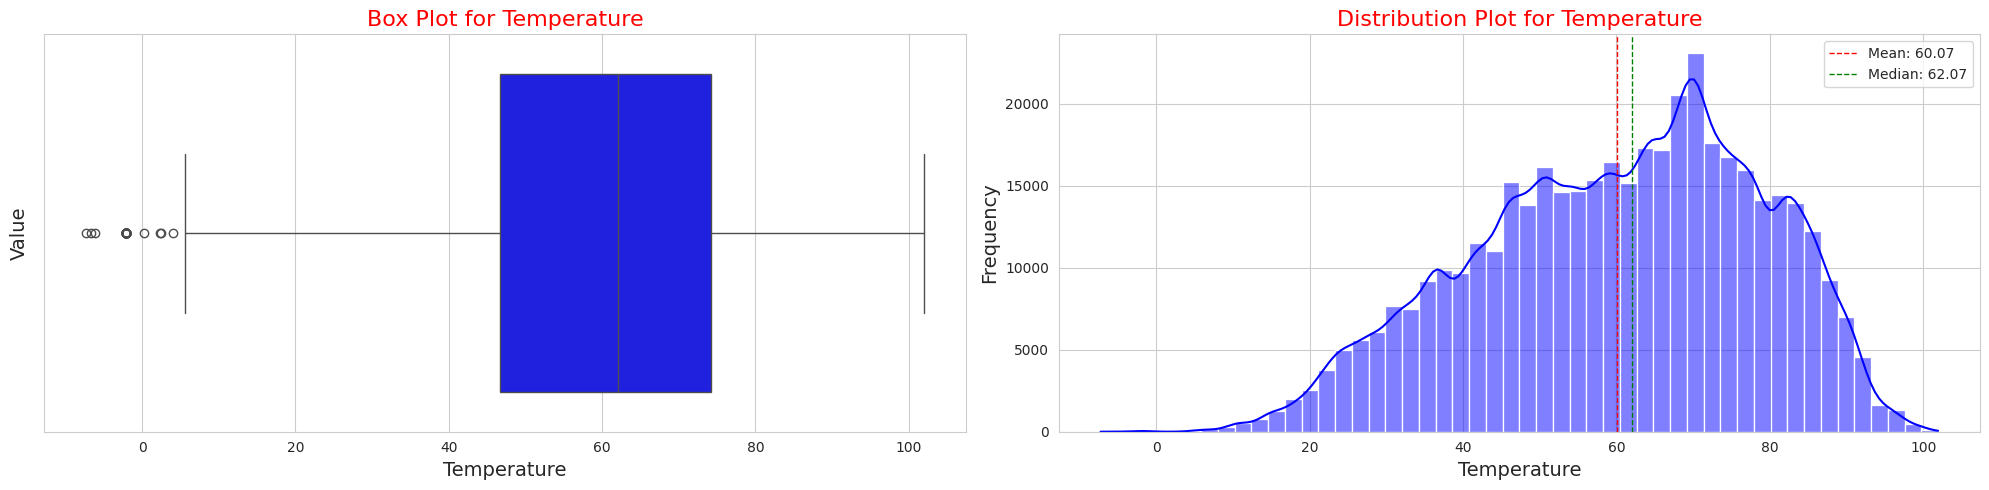

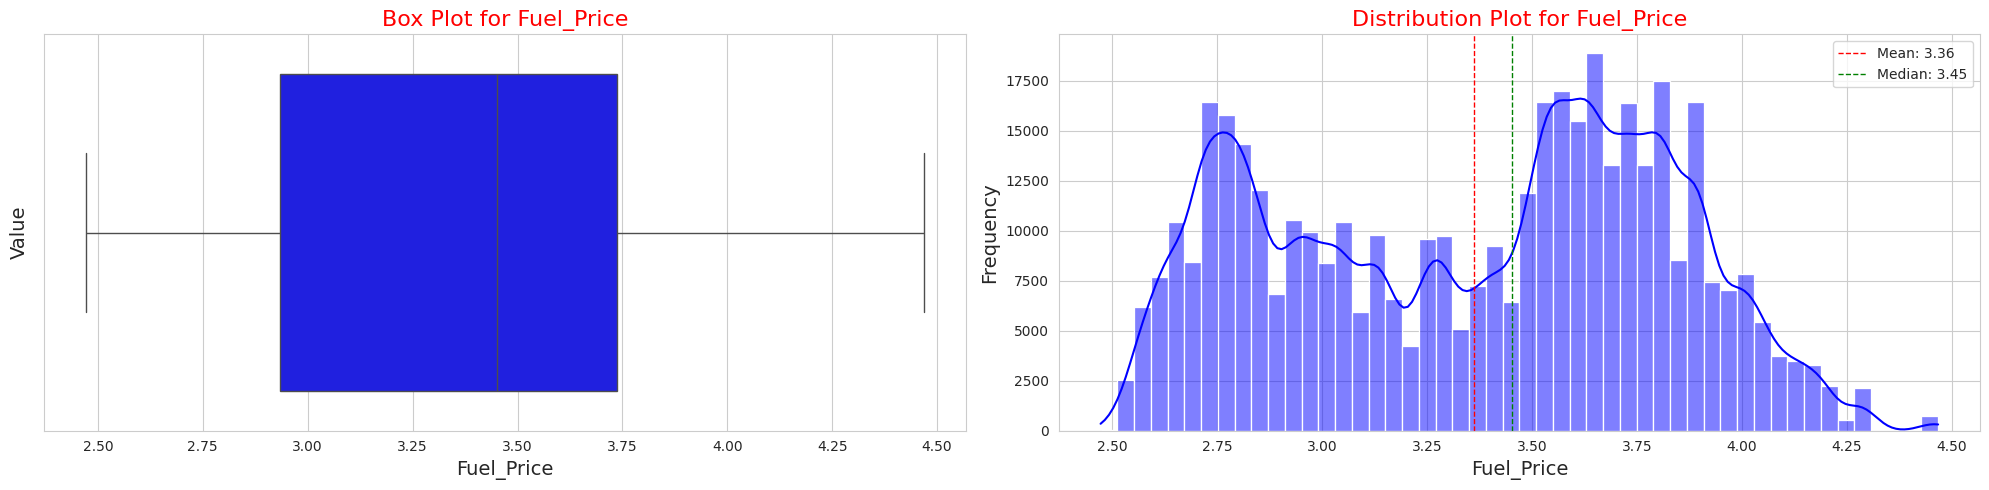

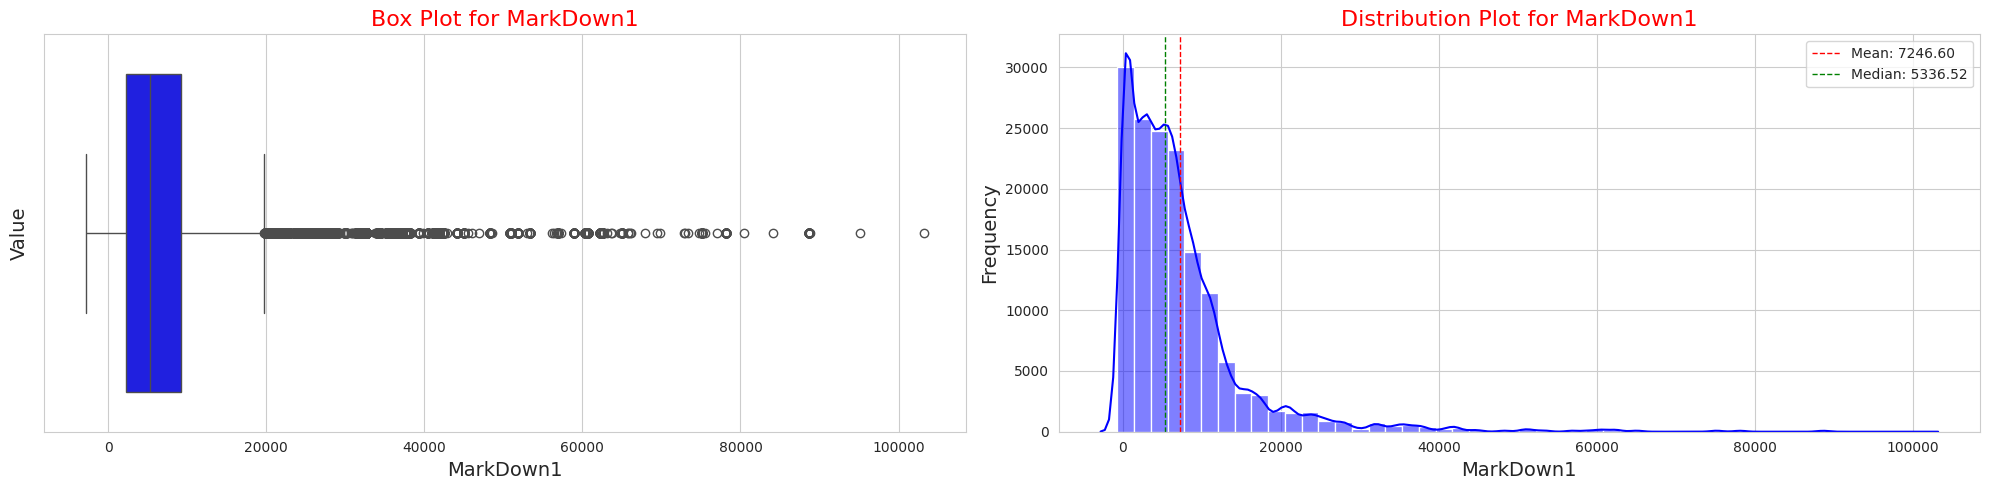

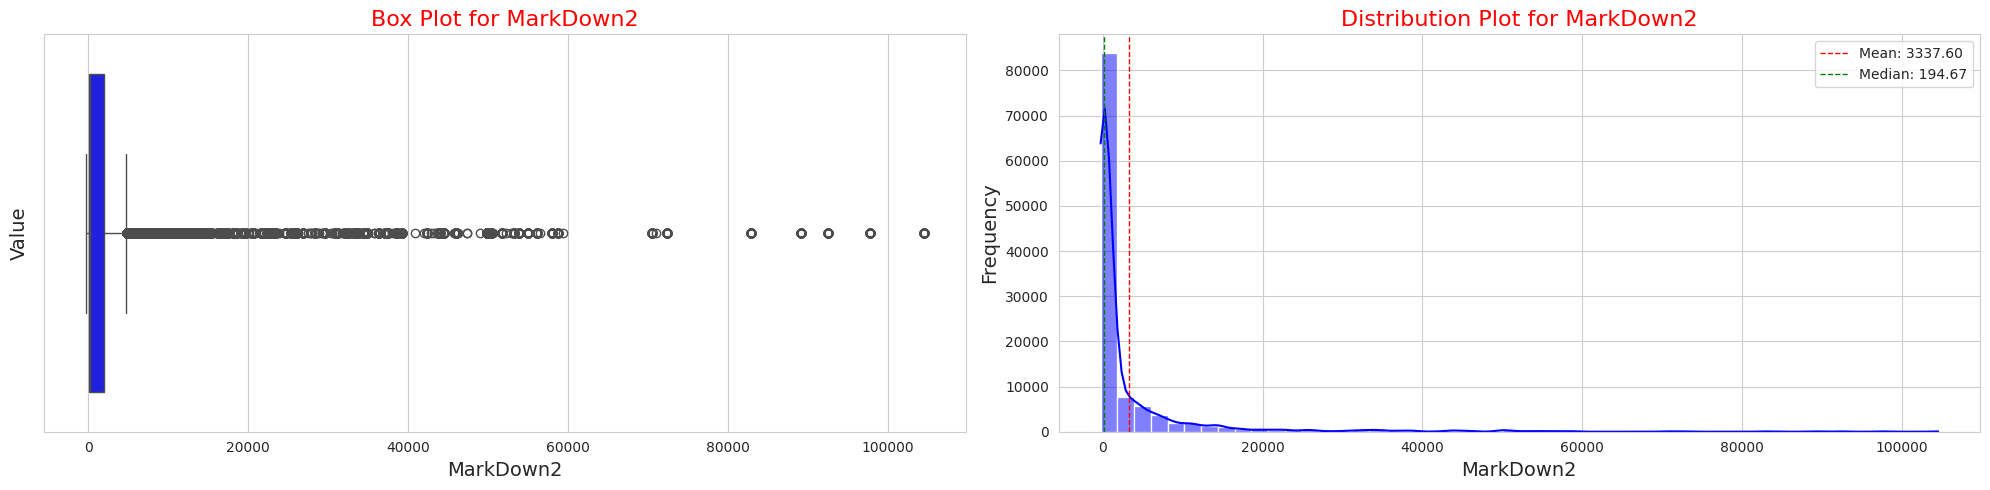

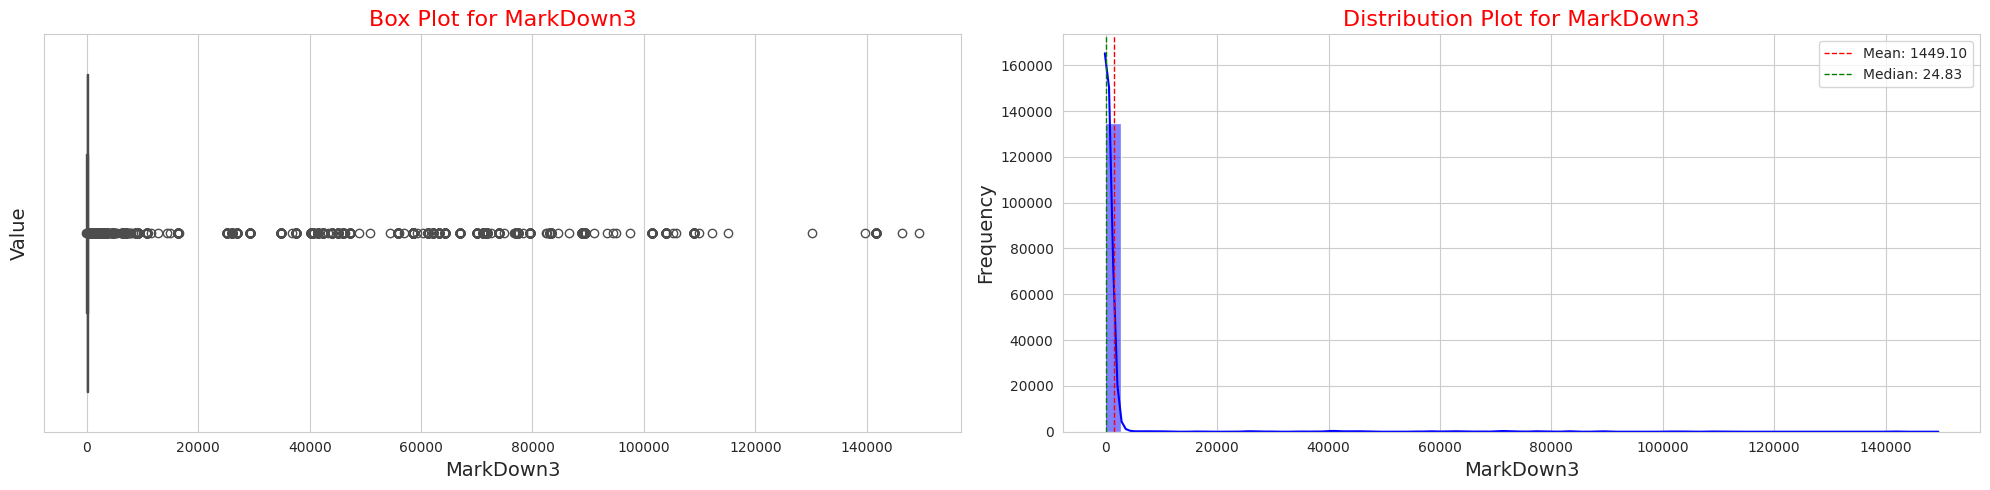

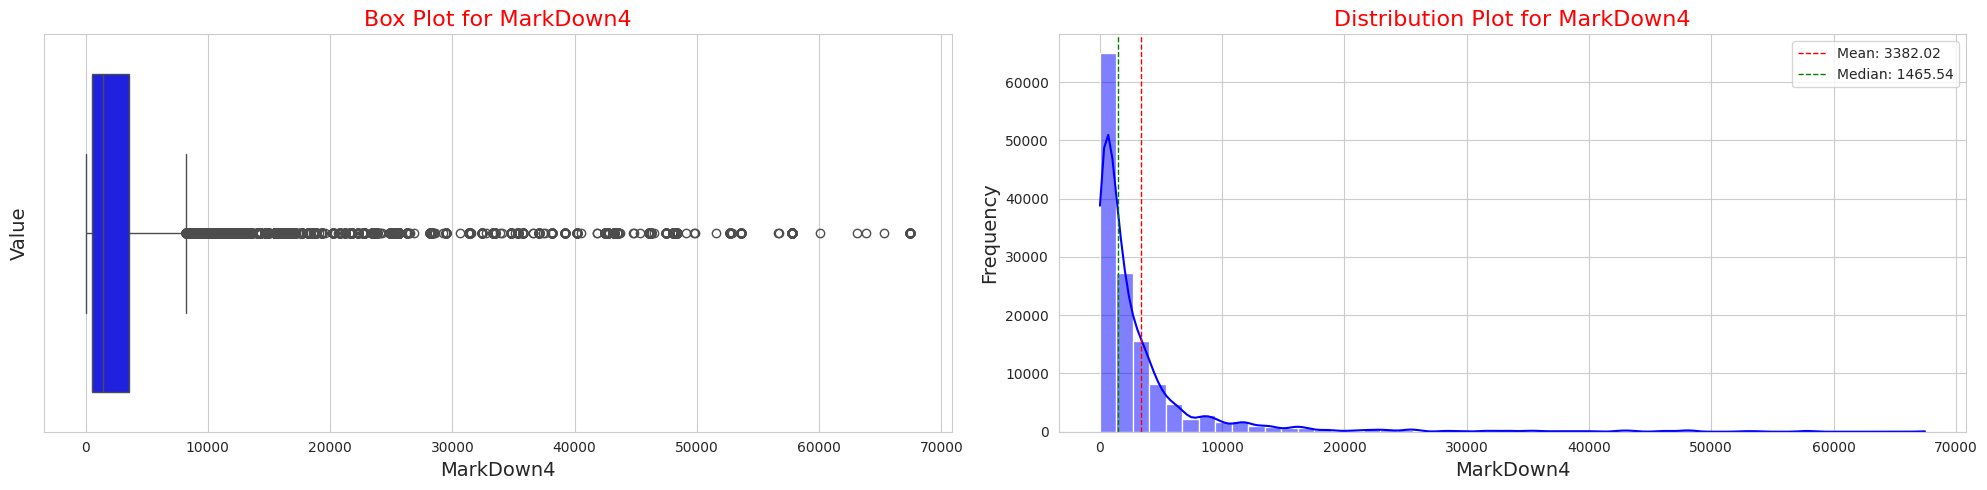

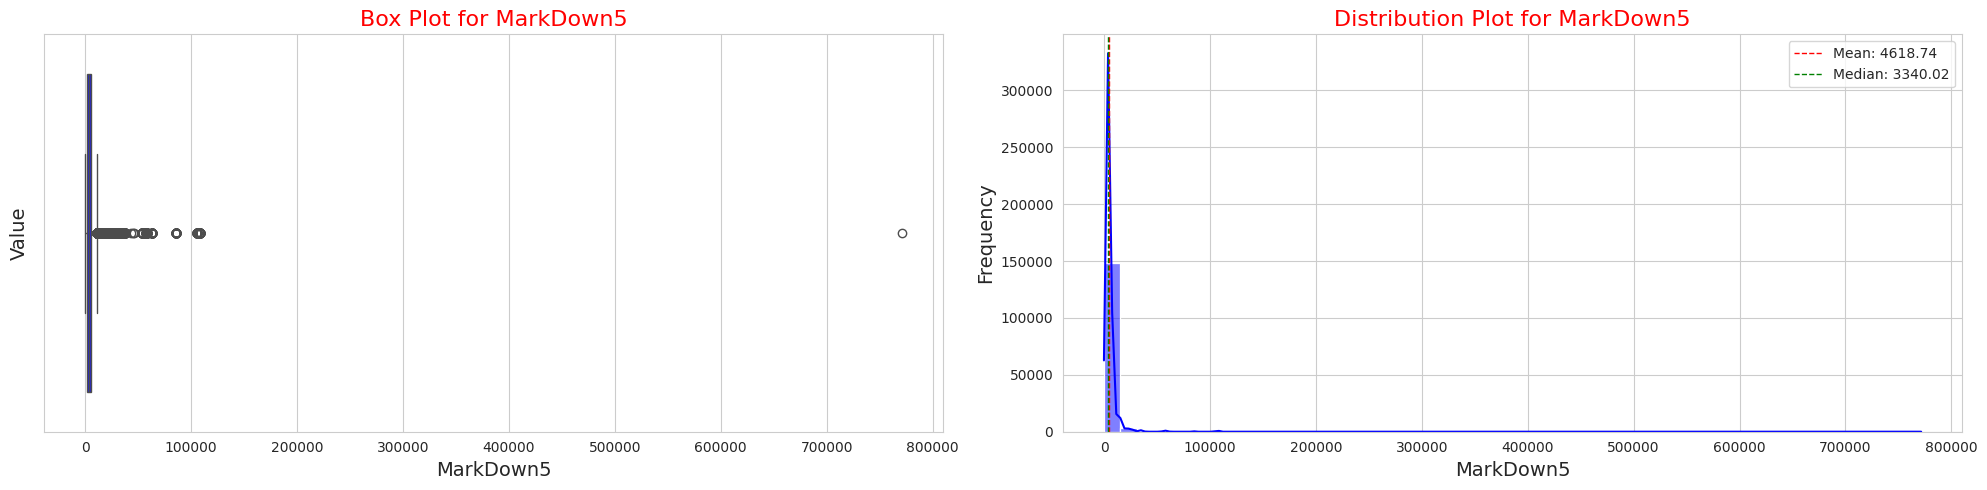

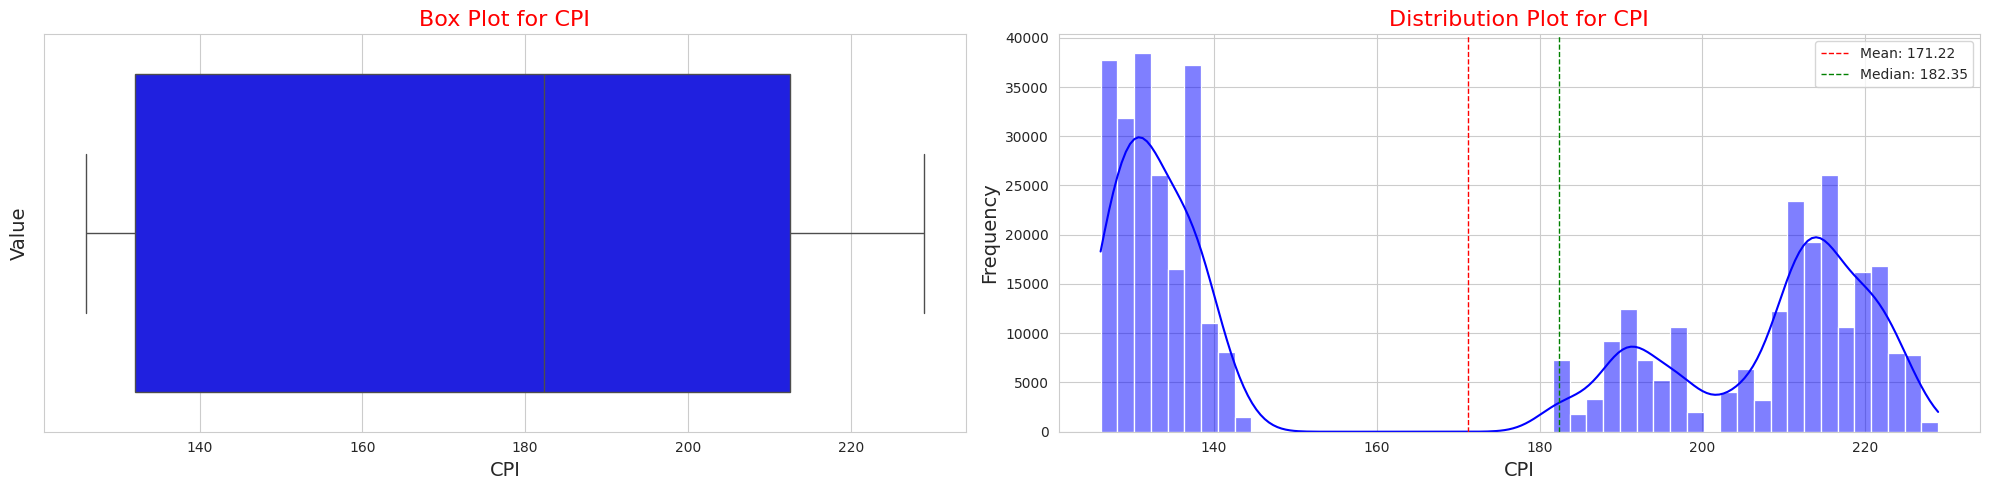

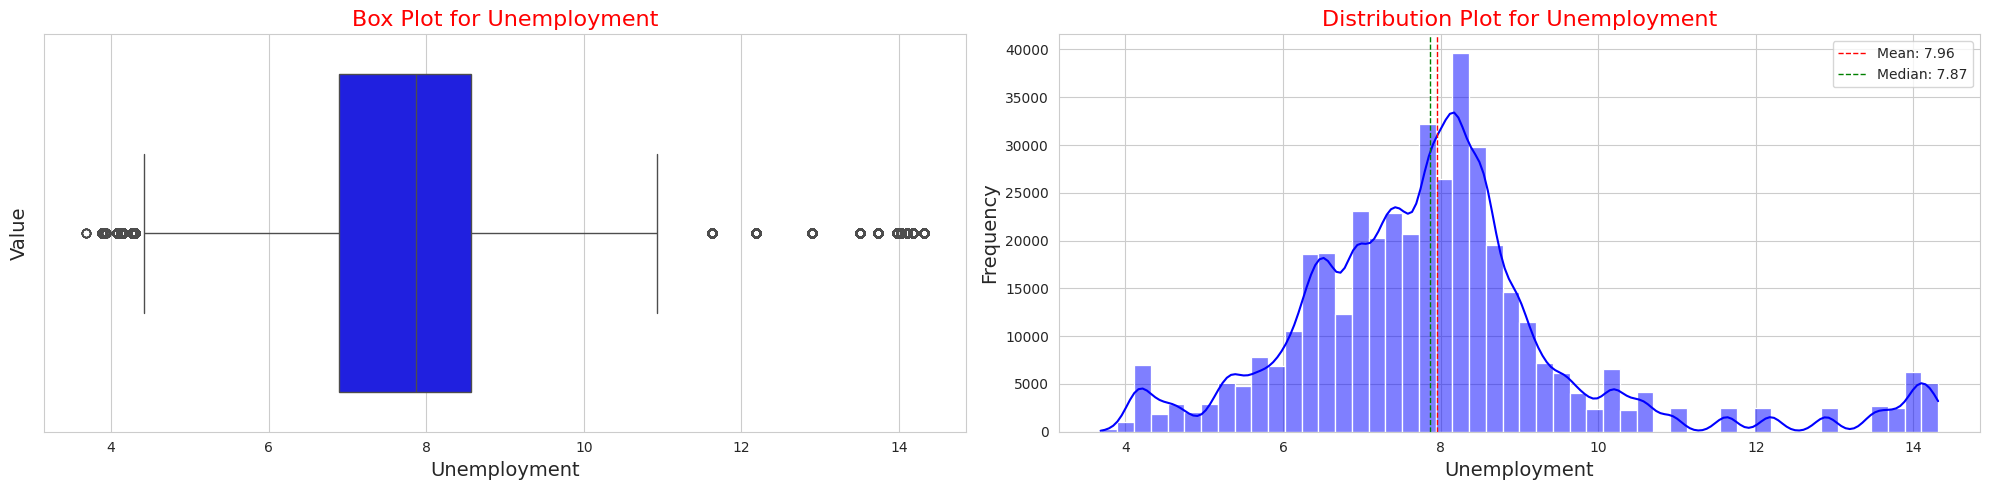

In [89]:
for i in numeric_columns:
  plot(df, i)

In [149]:

#distribution plot of Sales, as expected positively skewed
#sns.distplot(x=df['Temperatue'])

In [150]:
print("Markdown1 =", df.MarkDown1.isnull().sum()/421570)
print("Markdown2 =", df.MarkDown2.isnull().sum()/421570)
print("Markdown3 =", df.MarkDown3.isnull().sum()/421570)
print("Markdown4 =", df.MarkDown4.isnull().sum()/421570)
print("Markdown5 =", df.MarkDown5.isnull().sum()/421570)

Markdown1 = 0.6425789311383637
Markdown2 = 0.737227506701141
Markdown3 = 0.6752544061484451
Markdown4 = 0.6804540171264558
Markdown5 = 0.6407903788220224


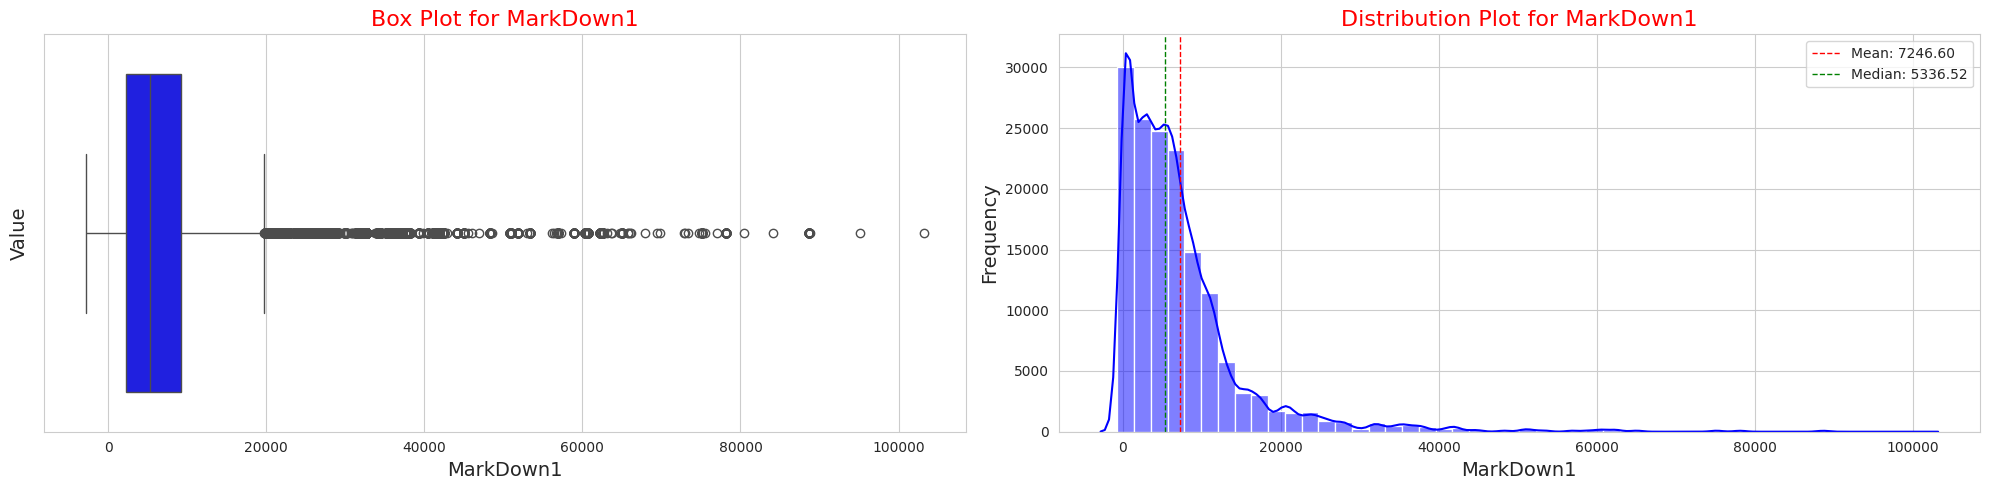

In [76]:
Markdown1=plot(df, 'MarkDown1')

In [152]:
df1=df.copy()
df1.MarkDown1.fillna(0, inplace = True)
# df.MarkDown2.fillna(0, inplace = True)
# df.MarkDown3.fillna(0, inplace = True)
# df.MarkDown4.fillna(0, inplace = True)
# df.MarkDown5.fillna(0, inplace = True)

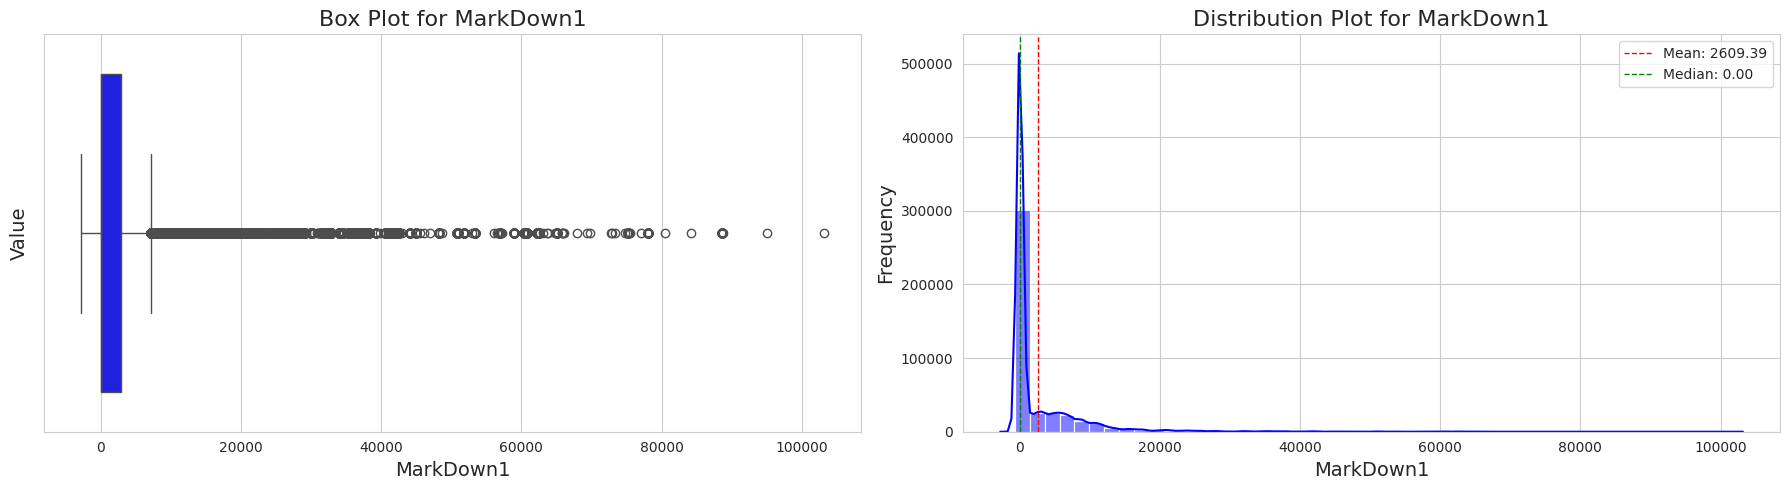

In [153]:
plot(df1, 'MarkDown1')

In [154]:
df2=df.copy()

In [155]:
df2.MarkDown1.fillna(df2.MarkDown1.median(), inplace=True)

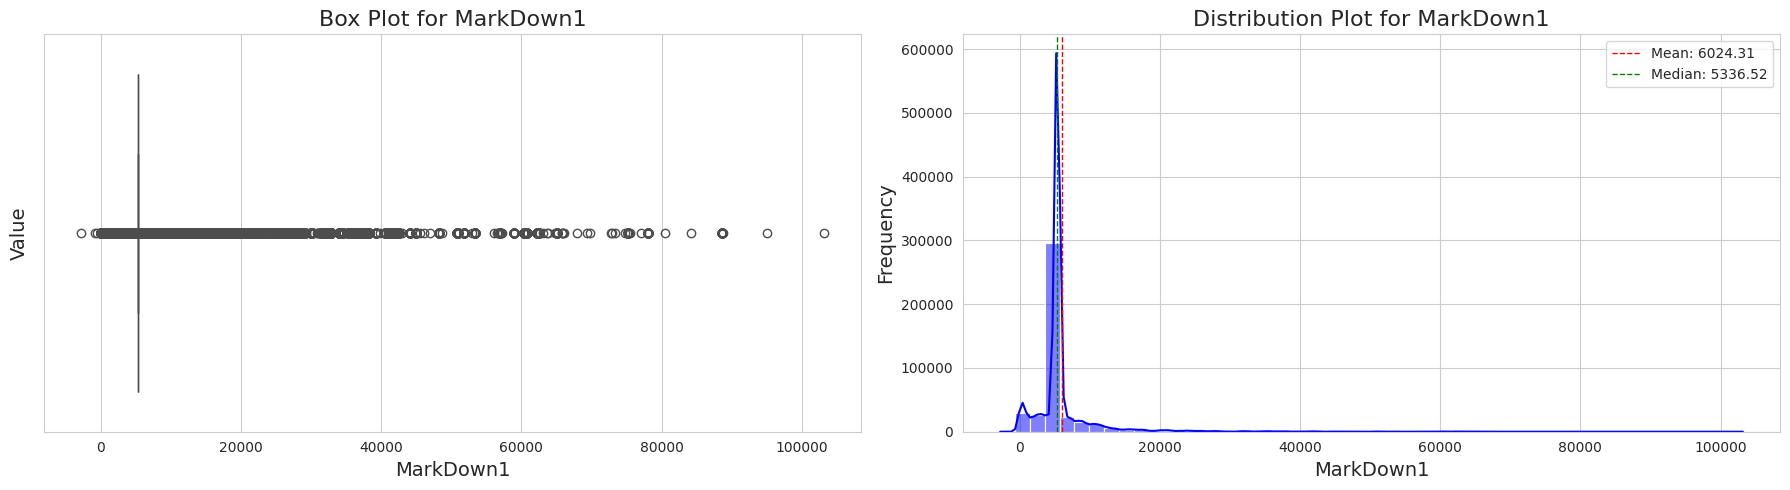

In [156]:
plot(df2, 'MarkDown1')

In [ ]:
df3=df.copy()

In [ ]:
df3.isnull().sum()

In [ ]:
df3.dropna(subset=['Type', 'Size', 'Dept', 'Weekly_Sales','CPI','Unemployment'], inplace=True)

In [ ]:
len(df3[df3['MarkDown1'].isnull()])

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and prediction sets for MarkDown1
train_df = df3[df3['MarkDown1'].notnull()]
predict_df = df3[df3['MarkDown1'].isnull()]

# Features and target
features = ['Store', 'Type', 'Size', 'Dept', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday', 'Day', 'Month', 'Year']
target = 'MarkDown1'

X_train = train_df[features]
y_train = train_df[target]
X_predict = predict_df[features]

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict missing values
predicted_values = model.predict(X_predict)

# Fill the missing values
df3.loc[df3['MarkDown1'].isnull(), 'MarkDown1'] = predicted_values

# Display the first few rows of the modified DataFrame
df3.head()

In [ ]:
len(predicted_values)

In [ ]:
plot(df3, 'MarkDown1')

Implementing ML techinique in DF

In [ ]:
df.dropna(subset=['Type', 'Size', 'Dept', 'Weekly_Sales','CPI','Unemployment'], inplace=True)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
#from sklearn.impute import SimpleImputer

# Display columns with null values
null_columns = df.columns[df.isnull().any()]
print("Columns with null values:", null_columns)

# Features to use for prediction (all columns except the MarkDown columns)
features = ['Store', 'Type', 'Size', 'Dept', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday', 'Day', 'Month', 'Year']

# Loop over each MarkDown column to predict and fill missing values
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for target in markdown_columns:
    # Split the data into training and prediction sets for the current MarkDown column
    train_df = df[df[target].notnull()]
    predict_df = df[df[target].isnull()]

    # Features and target
    X_train = train_df[features]
    y_train = train_df[target]
    X_predict = predict_df[features]

    # Initialize the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict missing values
    predicted_values = model.predict(X_predict)

    # Fill the missing values in the original DataFrame
    df.loc[df[target].isnull(), target] = predicted_values

# Display the first few rows of the modified DataFrame
df.head()

# Display columns with null values after imputation
null_columns_after = df.columns[df.isnull().any()]
print("Columns with null values after imputation:", null_columns_after)


In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for target in markdown_columns:
    plot(df, target)

Outlier Detection
Outliers and Z score:
In statistics, an outlier is a data point that differs significantly from other observations. Outliers can occur by chance in any distribution, but they often indicate either measurement error or that the population has a heavy-tailed distribution.

Z-score is a statistical measure that tells you how far is a data point from the rest of the dataset. In a more technical term, Z-score tells how many standard deviations away a given observation is from the mean.

z = (x-mean)/standard deviation

In [ ]:
import matplotlib.pyplot as plt
corr_df = df.copy()

# Create a heatmap
correlation_matrix = corr_df.corr()
plt.figure(figsize=(15, 5))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
correlation_matrix

In [ ]:
# Display the first few rows of the modified DataFrame
df

In [ ]:
df.isnull().sum()

In [ ]:
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)
    return iqr, upper_threshold, lower_threshold, upper_threshold - lower_threshold


In [ ]:
outlier(df, 'MarkDown1')

In [ ]:
plot(df, 'Unemployment')

In [ ]:
len(df[df['Unemployment'] > 11])

In [ ]:

len(df[df['Unemployment'] > 12])

In [ ]:
plot(df, 'Temperature')

In [ ]:
# # Statistical analysis
# from scipy import stats
# z_scores = stats.zscore(df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']])
# z_scores

In [ ]:
# threshold = 3
# outliers = (z_scores > threshold) | (z_scores < -threshold)

In [ ]:
plot(df, 'Weekly_Sales')

In [ ]:
df.drop(df[(df['Weekly_Sales'] < 0) | (df['Weekly_Sales'] >= 3)].index, inplace=True)

In [ ]:
len(df[(df['Weekly_Sales'] < 0)])

In [ ]:
len(df[(df['Weekly_Sales'] >=300000)])

In [ ]:
df.drop(df[(df['Weekly_Sales'] < 0) | (df['Weekly_Sales'] >= 300000)].index, inplace=True)

In [ ]:
# Encoding categorical variables and scaling numerical features.
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=True)
scaler = StandardScaler()
scaler.fit(df)
scaler_df = pd.DataFrame(scaler.transform(df), columns=df.columns)

In [ ]:
scaler_df.head(5)

In [ ]:
x=scaler_df.drop("Weekly_Sales",axis=1)
y=scaler_df["Weekly_Sales"]

In [ ]:
# Split data for training and testing & Optimizing model parameters
from sklearn.model_selection import train_test_split, GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42)

In [ ]:
# Randomly sample
sampled_data = df.sample(frac=0.05, random_state=42)
X=sampled_data.drop("Weekly_Sales",axis=1)
Y=sampled_data["Weekly_Sales"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25, random_state=42)

In [ ]:
# Machine Learning : Identifying algorithms/Model
from sklearn.linear_model import LinearRegression
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.datasets import load_boston

In [ ]:
import sklearn
print(sklearn.__version__)


In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, Y_train, Y_test)
print(models)

In [ ]:
# Machine Learning : Evaluation
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor().fit(x_train,y_train)
y_pred_train = RF_model.predict(x_train)
y_pred_test = RF_model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test


In [ ]:
from xgboost import XGBRegressor
XGB_model=XGBRegressor().fit(x_train,y_train)
y_pred_train = XGB_model.predict(x_train)
y_pred_test = XGB_model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT_model=DecisionTreeRegressor().fit(x_train,y_train)
y_pred_train = DT_model.predict(x_train)
y_pred_test = DT_model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor
GB_model=GradientBoostingRegressor().fit(x_train,y_train)
y_pred_train = GB_model.predict(x_train)
y_pred_test = GB_model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
ET_model=ExtraTreesRegressor().fit(x_train,y_train)
y_pred_train = ET_model.predict(x_train)
y_pred_test = ET_model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

In [ ]:
mse_test = mean_squared_error(y_test, y_pred_test)
mse_test

In [ ]:
from google.colab import drive
drive.mount('/content/drive')